 통신사고객이탈 데이터 EDA 과정

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지 무시
# import warnings
# warnings.filterwarnings('ignore')


## 1.  **라이브러리 로드**


Kaggle의 통신사 고객 이탈(Telco Customer Churn) 데이터를 사용하여 EDA 과정

1.  Kaggle https://www.kaggle.com/datasets/palashfendarkar/wa-fnusec-telcocustomerchurn
3. data file
   + https://github.com/treselle-systems/customer_churn_analysis/raw/refs/heads/master/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [97]:
# Matplotlib 한글 폰트 설정 (필요시)
# from matplotlib import font_manager, rc
# font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우 사용자
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)
# plt.rcParams['axes.unicode_minus'] = False # 음수 부호 깨짐 방지

## 2.  **데이터 불러오기 및 초기 탐색**:

- 데이터의 대략적인 형태를 파악합니다.
- 각 컬럼의 데이터 타입, 결측치 여부, non-null 개수 등을 확인
- 특히 `TotalCharges`가 `object` 타입
- 수치형 변수들의 기술 통계량(평균, 표준편차, 최솟값, 최댓값 등)을 확인.
- `customerID`는 분석에 직접적으로 필요하지 않으므로 제거


In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
ROOTDIR="/content/drive/MyDrive/"

In [100]:
# 1. 데이터 불러오기 및 초기 탐색
df = pd.read_csv(ROOTDIR+'/DATA/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [101]:
# !wget https://github.com/treselle-systems/customer_churn_analysis/raw/refs/heads/master/WA_Fn-UseC_-Telco-Customer-Churn.csv\
#  -O data/WA_Fn-UseC_-Telco-Customer-Churn.csv

In [102]:
# 컬럼 폭, 행 수
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50

In [103]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


통신사 고객 이탈 데이터셋(Telco Customer Churn) 컬럼

**고객 인구통계 정보 (Demographic Information)**

1.  **`gender`**: 고객의 성별. (Male, Female)
2.  **`SeniorCitizen`**: 고객이 고령자인지 여부. (0: 고령자 아님, 1: 고령자)
3.  **`Partner`**: 고객이 배우자와 함께 거주하는지 여부. (Yes, No)
4.  **`Dependents`**: 고객이 부양 가족이 있는지 여부. (Yes, No)

**고객 서비스 정보 (Services Information)**

5.  **`PhoneService`**: 고객이 전화 서비스를 사용하는지 여부. (Yes, No)
6.  **`MultipleLines`**: 고객이 여러 회선을 사용하는지 여부. (Yes, No, No phone service)
7.  **`InternetService`**: 고객의 인터넷 서비스 제공업체 유형. (DSL, Fiber optic, No)
8.  **`OnlineSecurity`**: 고객이 온라인 보안 서비스를 사용하는지 여부. (Yes, No, No internet service)
9.  **`OnlineBackup`**: 고객이 온라인 백업 서비스를 사용하는지 여부. (Yes, No, No internet service)
10. **`DeviceProtection`**: 고객이 기기 보호 서비스를 사용하는지 여부. (Yes, No, No internet service)
11. **`TechSupport`**: 고객이 기술 지원 서비스를 사용하는지 여부. (Yes, No, No internet service)
12. **`StreamingTV`**: 고객이 스트리밍 TV 서비스를 사용하는지 여부. (Yes, No, No internet service)
13. **`StreamingMovies`**: 고객이 스트리밍 영화 서비스를 사용하는지 여부. (Yes, No, No internet service)

**고객 계정 정보 (Account Information)**

14. **`Contract`**: 고객의 계약 유형. (Month-to-month: 월별, One year: 1년, Two year: 2년)
15. **`PaperlessBilling`**: 고객이 종이 없는 청구서(전자 청구서)를 사용하는지 여부. (Yes, No)
16. **`PaymentMethod`**: 고객의 결제 방식. (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
17. **`MonthlyCharges`**: 고객에게 매월 청구되는 총 금액. (수치형)
18. **`TotalCharges`**: 고객에게 총 청구된 금액. (수치형)
19. **`tenure`**: 고객이 회사에 가입한 개월 수. (수치형)

**타겟 변수 (Target Variable)**

20. **`Churn`**: 고객이 지난달에 이탈했는지 여부. (Yes: 이탈, No: 이탈 아님)

**식별자 (Identifier)**

21. **`customerID`**: 각 고객을 고유하게 식별하는 ID.

위 컬럼에서 고객 이탈에 영향을 미치는 피처가 있다는 가설을 세우고, EDA 및 예측 모델을 구성한다. 예를 들어, `tenure`가 낮거나 `MonthlyCharges`가 높은 고객이 `Churn`할 가능성이 높을 수 있다는 가설을 세울 수 있다.

In [104]:
print("\n데이터셋 정보:")
df.info()


데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null 

* `TotalCharges` 컬럼이 `object` 타입으로 공백 문자열이 있을 가능성


In [105]:
print("\n데이터셋 기술 통계량:")
df.describe()


데이터셋 기술 통계량:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [106]:
# 'customerID'는 분석에 필요 없으므로 제거
df = df.drop('customerID', axis=1)

In [107]:
df.shape

(7043, 20)

# 2. 결측치 및 이상치 처리



* 각 컬럼의 결측치 개수를 확인합니다.
* `TotalCharges`의 `NaN` 값은 신규 고객으로 인해 청구 내역이 없는 경우로 간주하여 `0`으로 대체
* 일부 범주형 컬럼 (`OnlineSecurity`, `MultipleLines` 등)에 'No internet service' 또는 'No phone service'와 같은 값이 있는데, 이는 'No'와 동일한 의미로 해석될 수 있으므로 `No`로 통일하여 범주 수를 줄이고 일관성을 확보합니다.
* 타겟 변수인 `Churn`을 'Yes'는 1, 'No'는 0으로 인코딩하여 수치형으로 변환합니다.


In [108]:
#결측치 및 이상치 처리
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


'TotalCharges' 컬럼에 공백 문자열이 있어서 NaN으로 변환해서 수치형으로 변환

In [109]:
# 공백 문자열을 NaN으로 변경 후 수치형으로 변환
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [110]:
#TotalCharges' 컬럼을 숫자로 변환 후 결측치
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [111]:
# 'TotalCharges'의 결측치는 서비스를 이용한 지 얼마 안 된 고객일 가능성이 높으므로 0으로 대체
# 또는 해당 행 제거 (데이터 양이 많다면 제거도 고려)
df['TotalCharges'] = df['TotalCharges'].fillna(0)
print(df.isna().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [112]:
#데이터 타입 확인 (변환 후)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [113]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [114]:
df.select_dtypes(include=['object']).nunique()

,0
gender,2
Partner,2
Dependents,2
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3
DeviceProtection,3
TechSupport,3


In [115]:
# object 형식의 컬럼의 고유값 개수 확인
cols = df.select_dtypes(include=['object']).nunique()
print(cols)

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64


In [116]:
# 컬럼의 고유값
for col in cols.index:
    print(f"\n{col} 고유값:")
    print(df[col].value_counts())


gender 고유값:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner 고유값:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents 고유값:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService 고유값:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines 고유값:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService 고유값:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity 고유값:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup 고유값:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection 고유값:
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: i

'No internet service', 'No phone service'를 'No'로 통일 (일관성을 위해)
 - 'No internet servic , No phone service : No service


In [117]:
# 예시: 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'] :
    df[col] = df[col].replace('No internet service', 'No')

df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [118]:
print(df.select_dtypes(include=['object']).nunique())

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       2
InternetService     3
OnlineSecurity      2
OnlineBackup        2
DeviceProtection    2
TechSupport         2
StreamingTV         2
StreamingMovies     2
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64


In [119]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [120]:
# Churn 컬럼을 0과 1로 인코딩
df['Churn'] = df['Churn'].map({ 'Yes' : 1, 'No' : 0 })

In [121]:
df['Churn'].unique()

array([0, 1])

In [122]:
print( df['Churn'].value_counts() )

Churn
0    5174
1    1869
Name: count, dtype: int64


# 3. 단변량 분석 (Univariate Analysis)

* 데이터셋을 범주형 변수와 수치형 변수로 분리합니다.
* **범주형 변수**: `countplot`을 사용하여 각 범주의 빈도수 분포를 시각화합니다. (예: 성별, 파트너 유무, 인터넷 서비스 종류 등)
* **수치형 변수**: `histplot` (히스토그램과 KDE)을 사용하여 `Tenure`, `MonthlyCharges`, `TotalCharges`와 같은 수치형 변수의 분포 형태를 시각화하고, 왜도(skewness) 등을 파악합니다.


In [123]:
# 범주형 변수와 수치형 변수 분리
categorical_features = df.select_dtypes(include='object').columns

numerical_features = df.select_dtypes(exclude='object').columns


print("\n범주형 변수:")
print(categorical_features)


print("\n수치형 변수:")
print(numerical_features)



범주형 변수:
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

수치형 변수:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')


In [124]:
len(categorical_features)

15

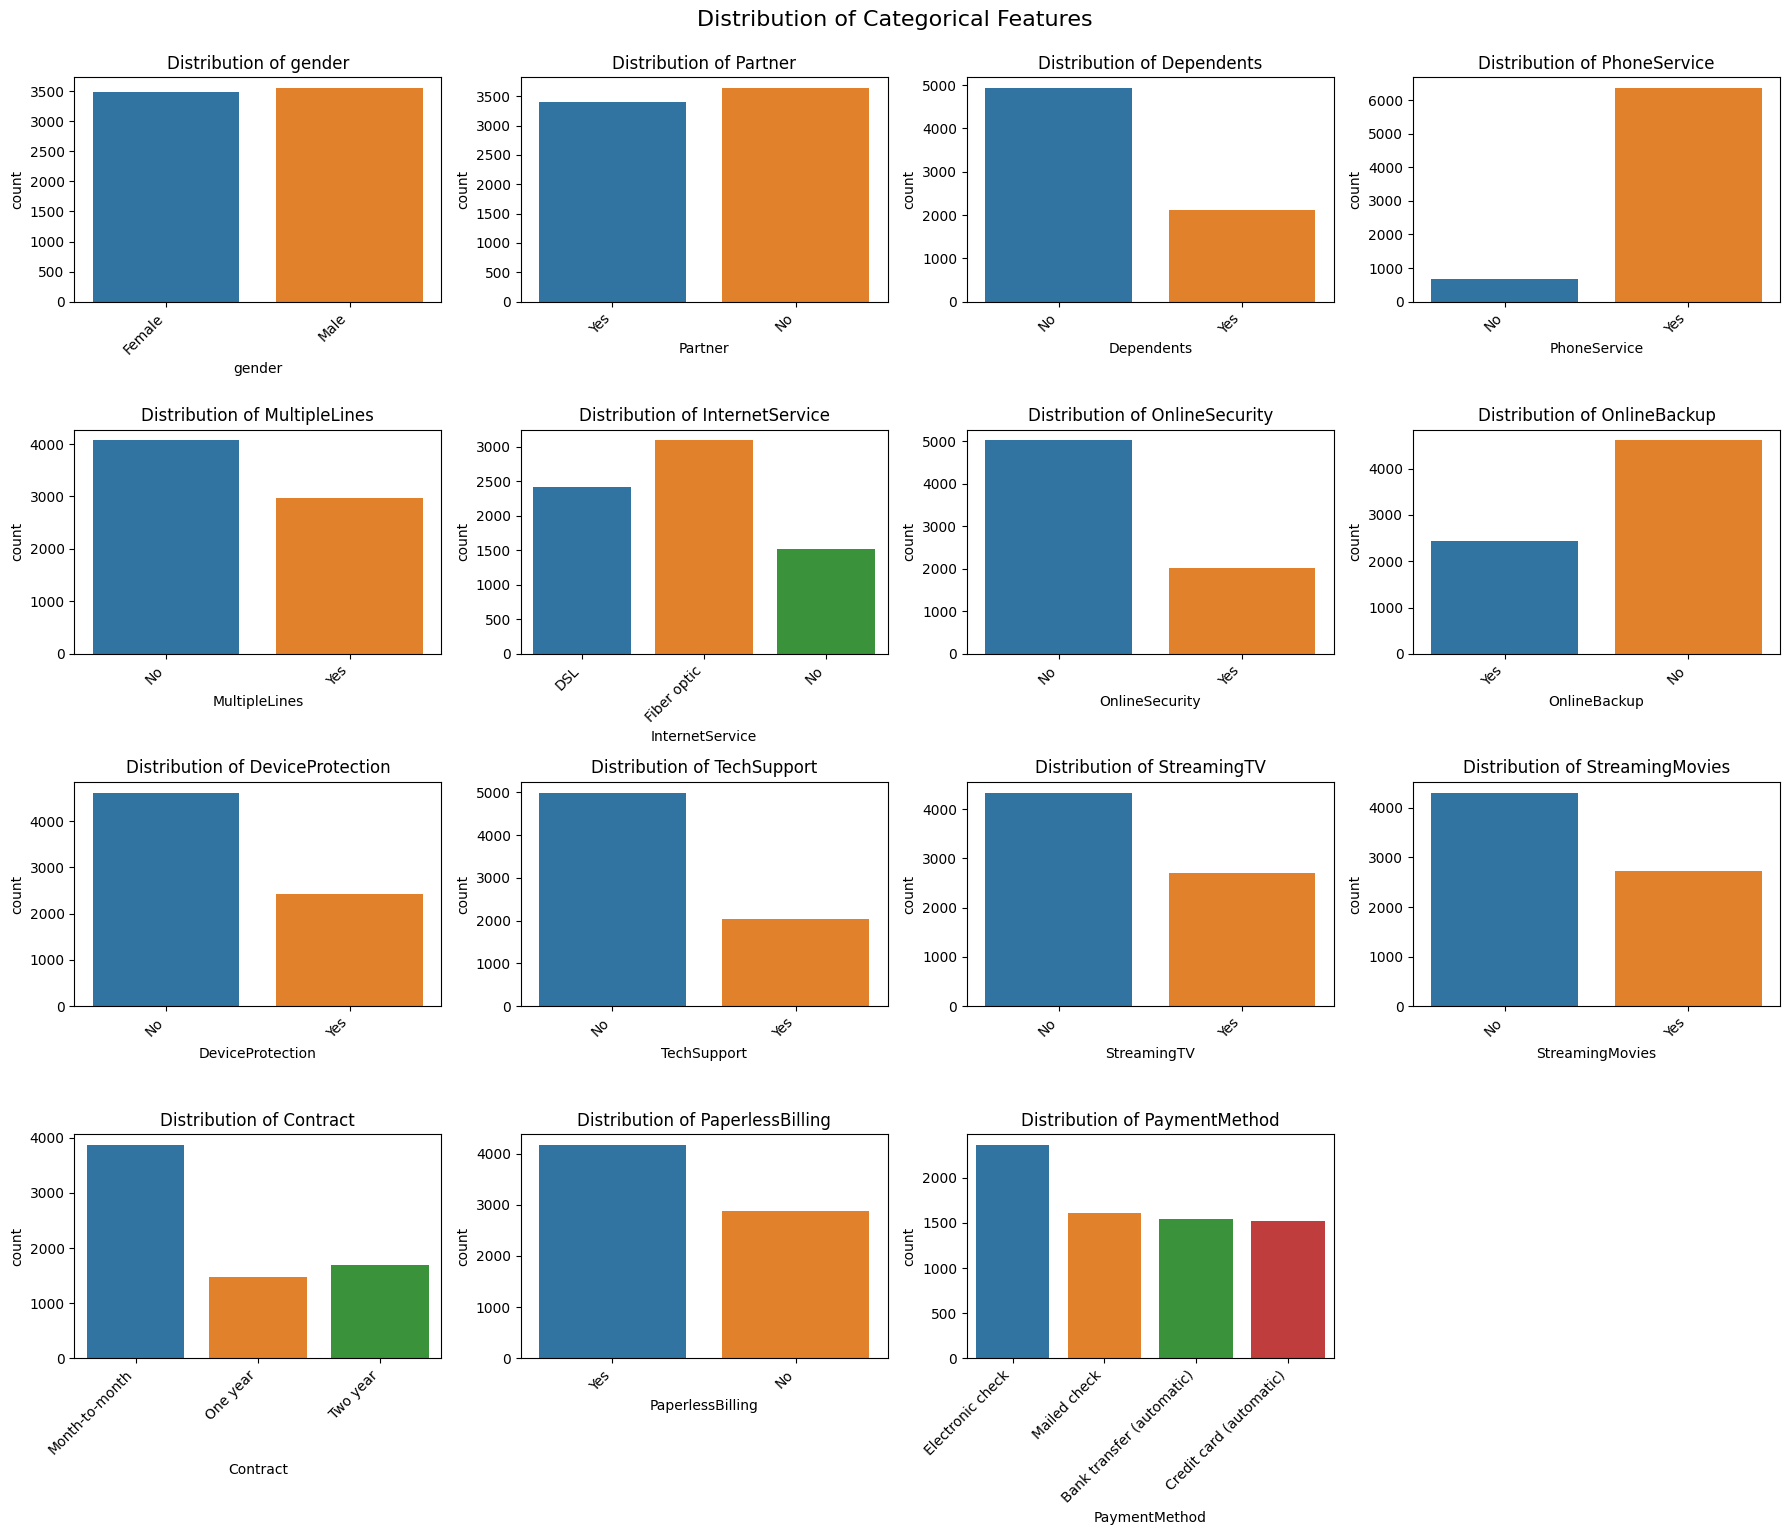

In [125]:
# 범주형 변수 분포 시각화
plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_features):

    plt.subplot( 4, 4, i + 1)

    sns.countplot(data=df, x=col, hue=col)

    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.suptitle('Distribution of Categorical Features', y=1.02, fontsize=16)
plt.show()


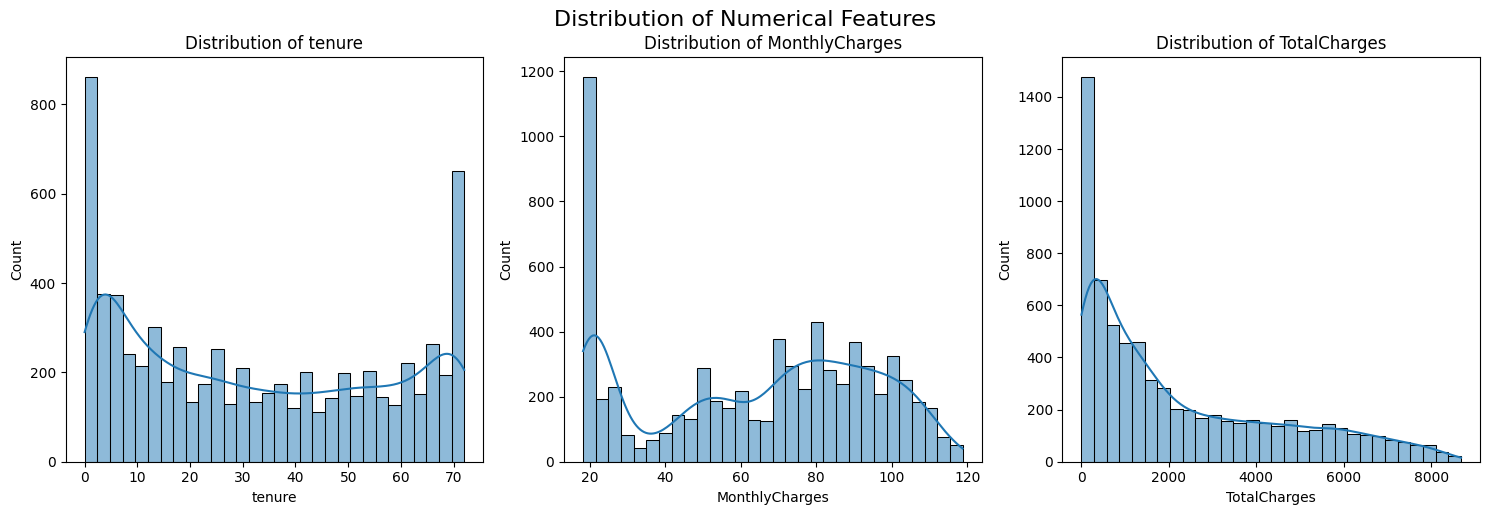

In [126]:
# 수치형 변수 분포 시각화
plt.figure(figsize=(15, 5))
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data=df, x=col, kde=True, bins=30)

    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.suptitle('Distribution of Numerical Features', y=1.02, fontsize=16)
plt.show()

# 4. 이변량 분석 (Bivariate Analysis)


* **Churn 비율**: 전체 고객 중 이탈 고객의 비율을 계산하고 막대 그래프로 시각화하여 불균형 여부를 확인합니다.
* **범주형 변수 vs. Churn**: `countplot`로 각 범주별 이탈 고객과 비이탈 고객의 분포를 비교합니다.
* **수치형 변수 vs. Churn**: `boxplot`을 사용하여 이탈 고객과 비이탈 고객 그룹 간의 평균, 중앙값, 사분위수 등이 어떻게 다른지 확인합니다.



고객 이탈 비율:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


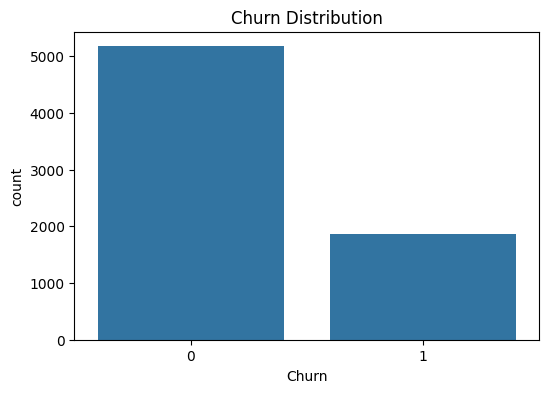

In [127]:
# Churn 비율 확인

churnrate = df['Churn'].value_counts(normalize=True) * 100

print(f"\n고객 이탈 비율:\n{churnrate}")

plt.figure(figsize=(6, 4))

sns.countplot(data=df, x='Churn', legend=True)

plt.title('Churn Distribution')
plt.show()


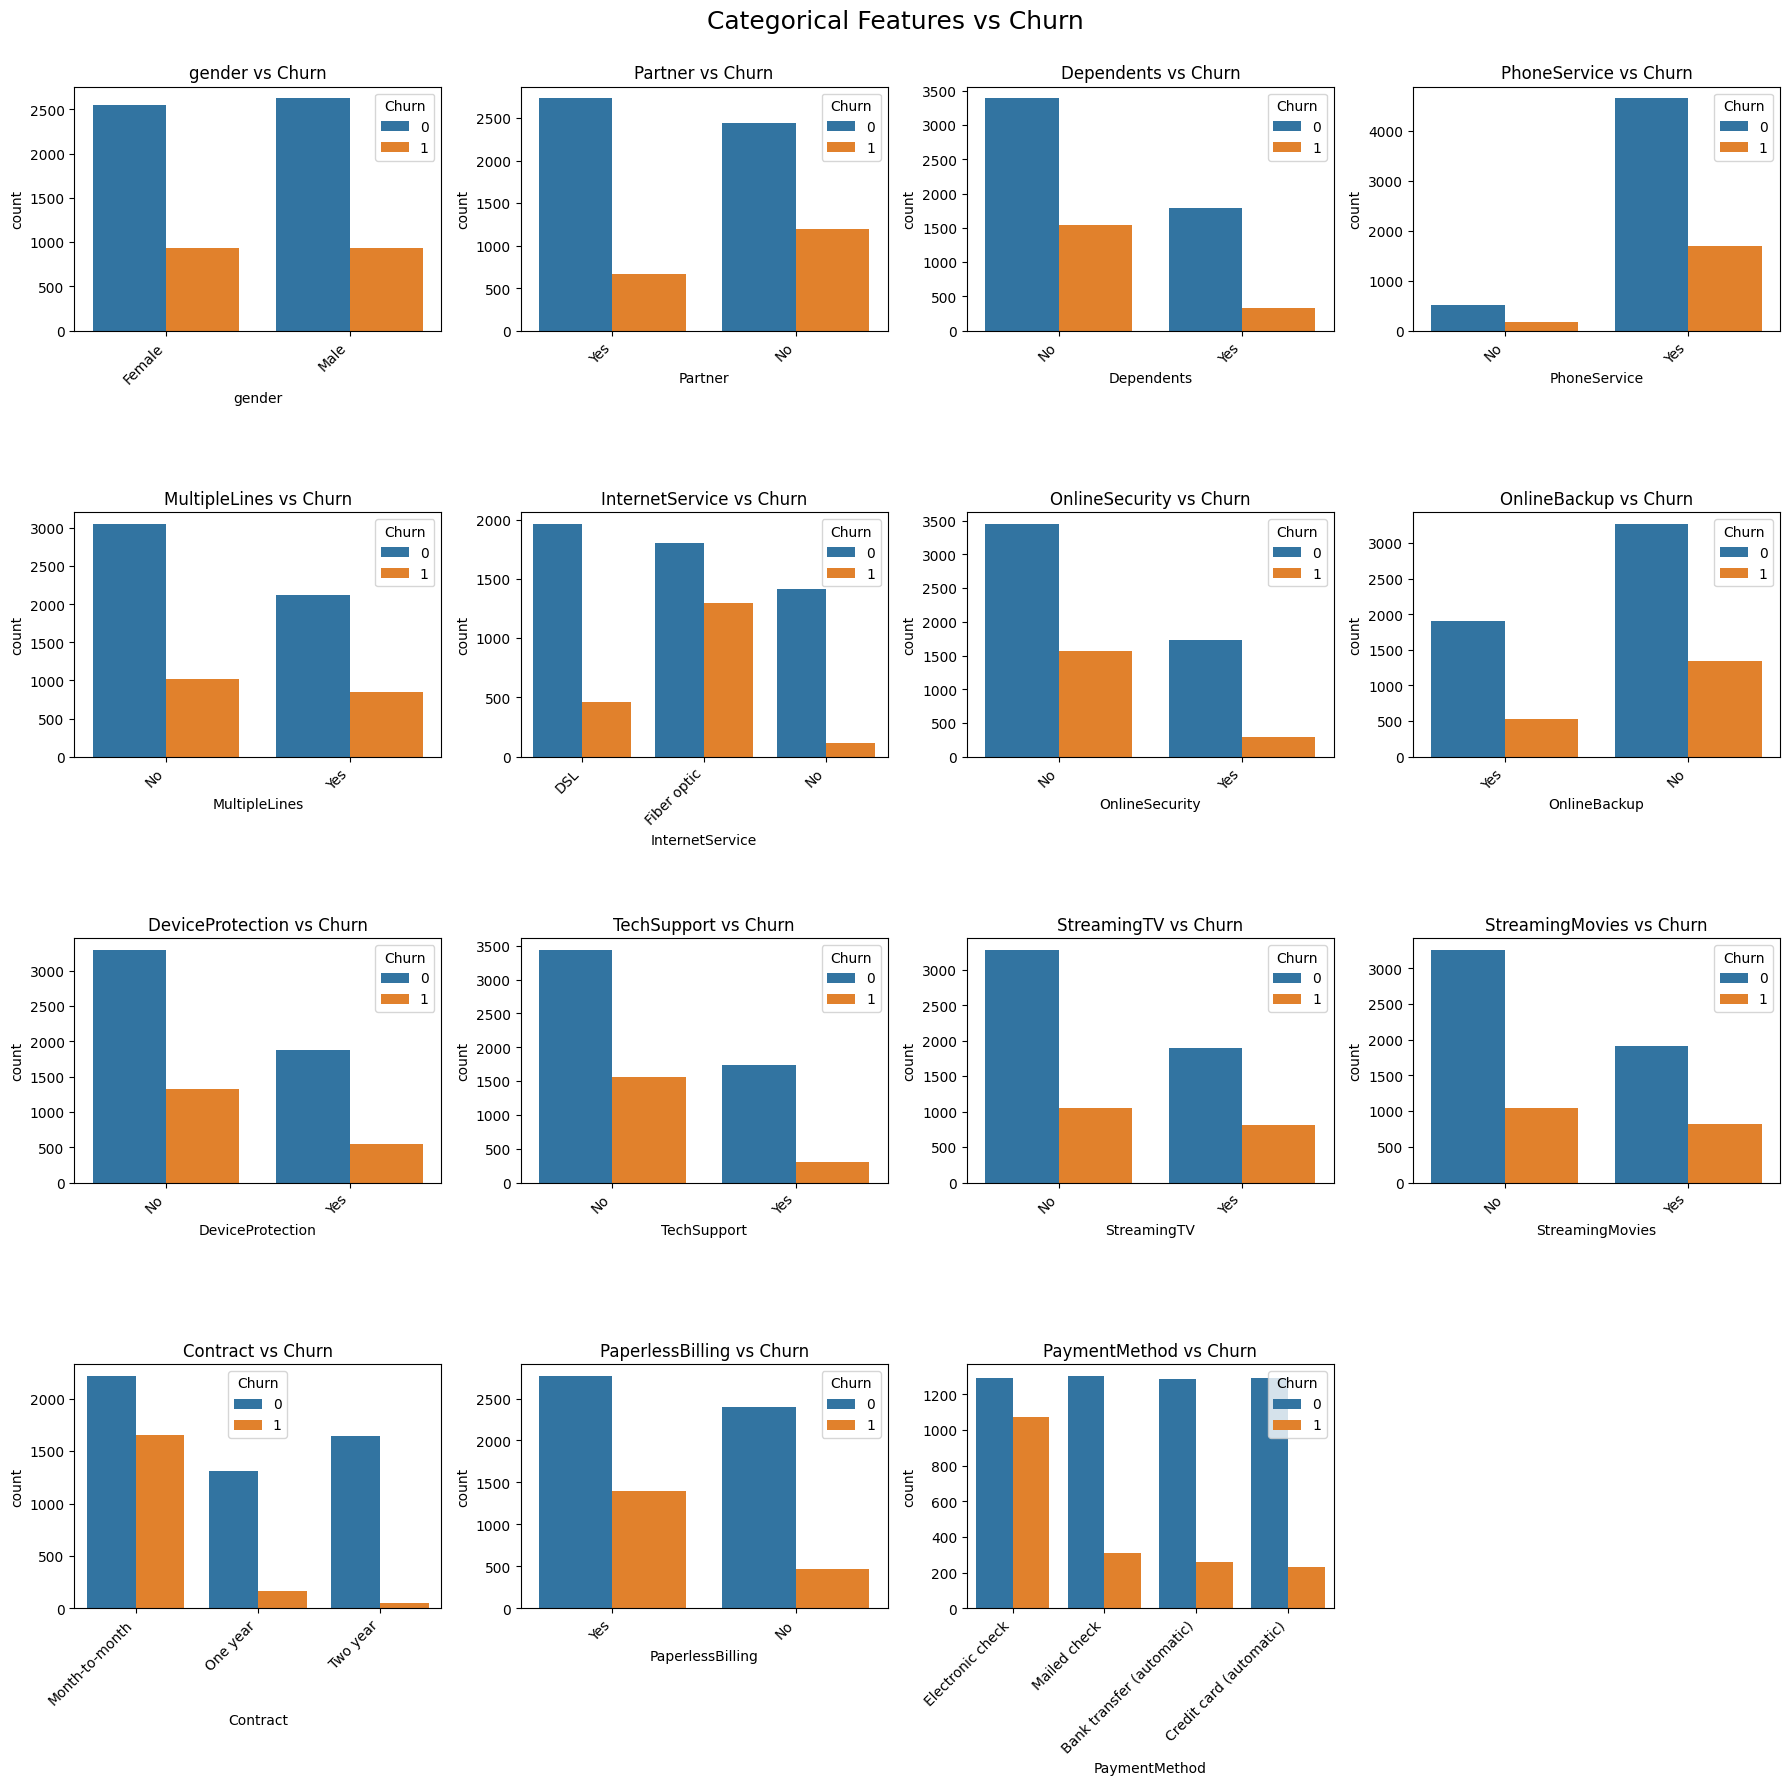

In [128]:
# 범주형 변수와 Churn 간의 관계
plt.figure(figsize=(18, 20))
for i, col in enumerate(categorical_features):
    plt.subplot( 5, 4, i + 1)

    sns.countplot(data=df, x=col, hue='Churn')

    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.suptitle('Categorical Features vs Churn', y=1.02, fontsize=18)
plt.show()


이를 통해 어떤 범주가 이탈에 더 큰 영향을 미치는지 직관적으로 파악
 - 예: `Contract` 유형별 이탈율


`Churn` 대비 `Tenure`, `MonthlyCharges`, `TotalCharges`의 분포 차이를 시각화

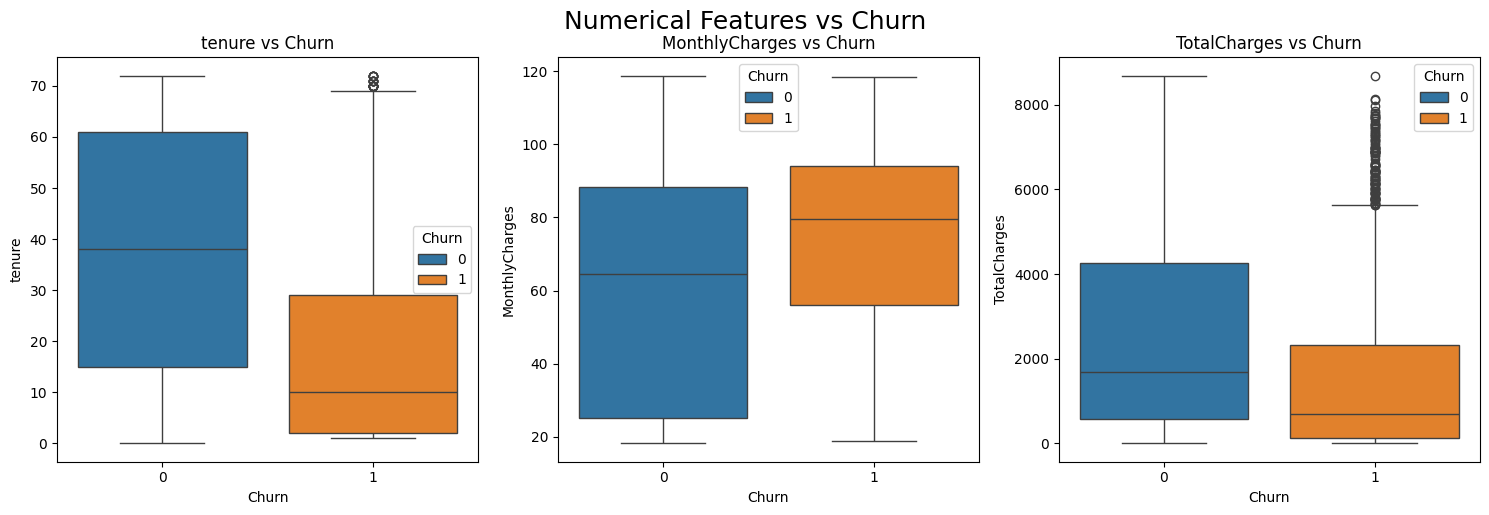

In [129]:
# 수치형 변수와 Churn 간의 관계
plt.figure(figsize=(15, 5))
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):

    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, x='Churn', y=col, hue='Churn')

    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.suptitle('Numerical Features vs Churn', y=1.02, fontsize=18)
plt.show()

# 5. 상관성 분석 (Correlation Analysis)


* 수치형 변수들 간의 상관 관계 매트릭스를 계산하고 `heatmap`으로 시각화합니다.
  - 변수 사이의 상관계수로 다중 공선성(multicollinearity)과 같은 잠재적 문제를 파악.
     - 독립 변수들 사이에 ***강한 선형 상관관계*** 가 존재하는 현상
     - 절대값이 0.8 또는 0.9 이상인 매우 높은 상관 계수
* `Churn` 컬럼과 다른 수치형 변수들 간의 상관 관계를 확인하여 `Churn`에 가장 영향을 많이 미치는 수치형 변수를 파악합니다.

In [130]:
#상관 관계 분석
correlation_matrix = df[numerical_features].corr()
print("\n수치형 변수 간의 상관 관계 매트릭스:")
print(correlation_matrix)



수치형 변수 간의 상관 관계 매트릭스:
                SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
SeniorCitizen        1.000000  0.016567        0.220173      0.103006   
tenure               0.016567  1.000000        0.247900      0.826178   
MonthlyCharges       0.220173  0.247900        1.000000      0.651174   
TotalCharges         0.103006  0.826178        0.651174      1.000000   
Churn                0.150889 -0.352229        0.193356     -0.198324   

                   Churn  
SeniorCitizen   0.150889  
tenure         -0.352229  
MonthlyCharges  0.193356  
TotalCharges   -0.198324  
Churn           1.000000  


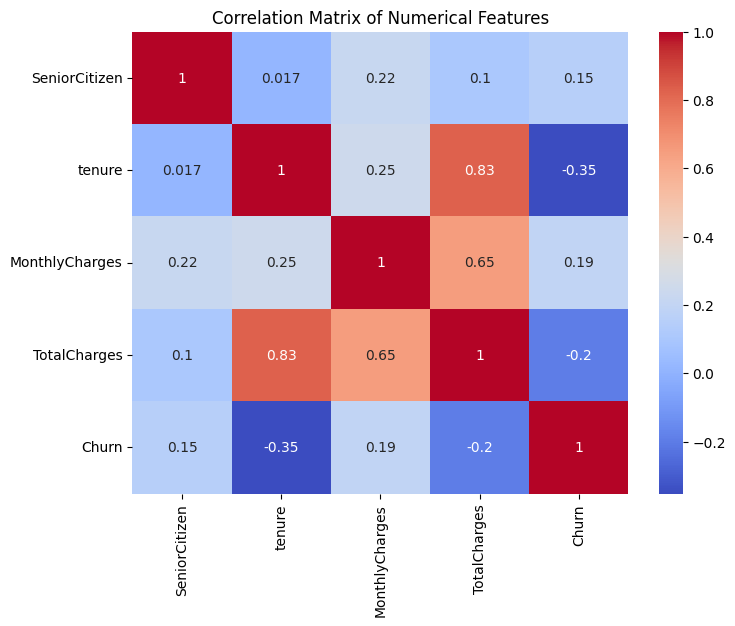

In [131]:
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [132]:
# Churn과 다른 변수들의 상관 관계 (수치형 변수)



해석
- MonthlyCharges와 Churn 사이에 약한 양의 선형 상관관계가 있다.
    - 이는 고객의 월별 요금이 높아질수록 고객 이탈 확률이 다소 증가하는 경향이 있다.
- SeniorCitizen : 매우 약한 양의 선형 상관관계가 있습니다.
    - 고령자(SeniorCitizen = 1)일수록 고객 이탈 확률이 비고령자(SeniorCitizen = 0)보다 약간 더 높은 경향이 있다
- TotalCharges: otalCharges와 Churn 사이에 약한 음의 선형 상관관계가 있다.
    - 이는 고객이 서비스에 대해 총 지불한 금액이 많을수록 고객 이탈 확률이 다소 감소하는 경향이 있다

- tenture: tenure와 Churn 사이에 중간 정도의 음의 선형 상관관계가 있다.
   - 고객의 가입 기간(개월 수)이 길어질수록 고객 이탈 확률이 명확하게 감소하는 경향이 있다

# 6. 다양한 피처 이해

EDA 과정에서 얻은 시각화와 통계량을 바탕으로 고객 이탈에 대한 주요 이해를 해간다


예를 들어, 단기 계약 고객의 이탈율이 높다거나, 특정 인터넷 서비스 사용 고객의 이탈율이 높다는 등의 결론을 내릴 수 있습니다. 계약 기간(Contract)별 이탈율을 살펴보겠습니다.

In [141]:
# 계약 기간(Contract)별 이탈율
df.groupby('Contract')['Churn'].value_counts(normalize=True)

Contract        Churn
Month-to-month  0        0.572903
                1        0.427097
One year        0        0.887305
                1        0.112695
Two year        0        0.971681
                1        0.028319
Name: proportion, dtype: float64

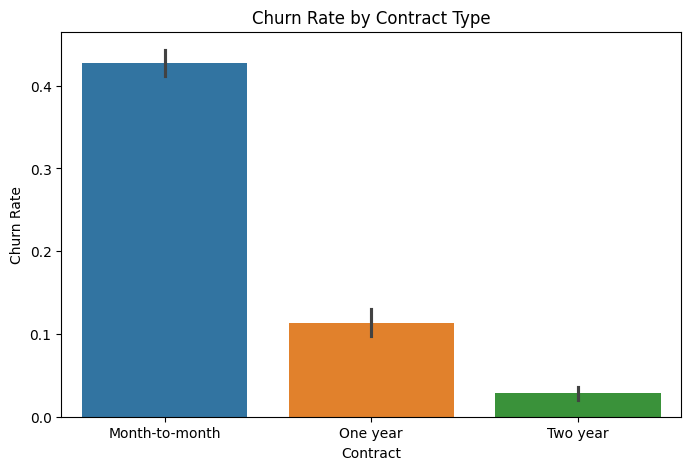

In [142]:
# 계약 기간(Contract)별 이탈율 시각화
plt.figure(figsize=(8, 5))

sns.barplot(data=df, x='Contract', y='Churn', hue='Contract')

plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.show()


In [144]:
# 인터넷 서비스(InternetService)별 이탈율
print("\n인터넷 서비스별 이탈율:")
df_is = df.groupby('InternetService')['Churn'].value_counts(normalize=True)
df_is


인터넷 서비스별 이탈율:


InternetService  Churn
DSL              0        0.810409
                 1        0.189591
Fiber optic      0        0.581072
                 1        0.418928
No               0        0.925950
                 1        0.074050
Name: proportion, dtype: float64

In [145]:
df_is.unstack() * 100

Churn,0,1
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


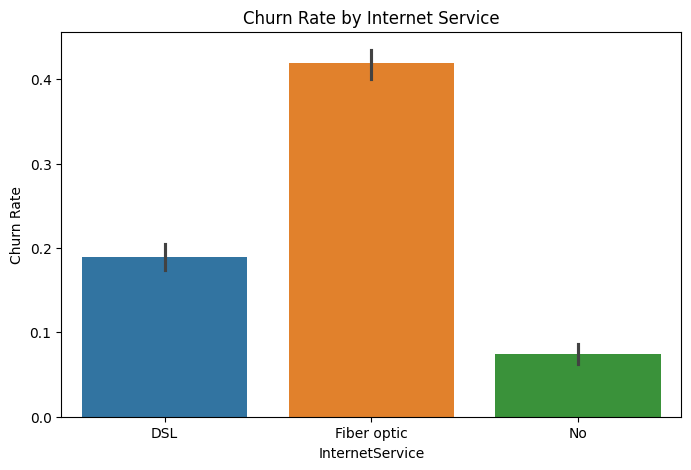

In [147]:
# 인터넷 서비스(InternetService)별 이탈율 시각화
plt.figure(figsize=(8, 5))

sns.barplot(data=df, x='InternetService', y='Churn', hue='InternetService')

plt.title('Churn Rate by Internet Service')
plt.ylabel('Churn Rate')
plt.show()


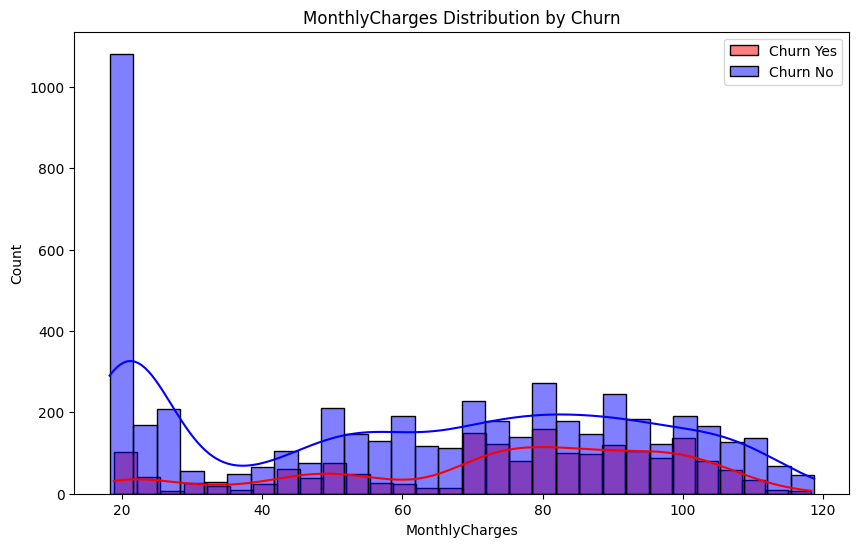

In [151]:
# 월별 요금(MonthlyCharges)에 따른 이탈 고객 분포
plt.figure(figsize=(10, 6))

sns.histplot(df[df['Churn'] == 1]['MonthlyCharges'], bins=30, kde=True, color='red', label='Churn Yes' )
sns.histplot(df[df['Churn'] == 0]['MonthlyCharges'], bins=30, kde=True, color='blue', label='Churn No' )

plt.title('MonthlyCharges Distribution by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Count')
plt.legend()
plt.show()

# 저장

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [139]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [153]:
# 저장 : data/processed_churn_data.csv
df.to_csv(ROOTDIR+'/DATA/processed_churn_data.csv', index=False)

In [154]:
! ls drive/MyDrive/DATA/*.csv

drive/MyDrive/DATA/Advertising.csv
drive/MyDrive/DATA/bmi20000.csv
drive/MyDrive/DATA/churn_data.csv
drive/MyDrive/DATA/processed_churn_data.csv
drive/MyDrive/DATA/titanic.csv
drive/MyDrive/DATA/titanic_test.csv
drive/MyDrive/DATA/titanic_train.csv
drive/MyDrive/DATA/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [156]:
! more drive/MyDrive/DATA/processed_churn_data.csv

gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Intern
etService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,S
treamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharg
es,Churn
Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic che
ck,29.85,29.85,0
Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,18
89.5,0
Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53
.85,108.15,1
Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automa
tic),42.3,1840.75,0
Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electro
nic check,70.7,151.65,1
Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Ele
ctronic check,99.65,820.5,1
Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Cred
it card (automatic),89.1,1949.4,0
Female,0,No,No,10,No,No,DSL,Yes,No,No,